In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import sklearn as sk
import numpy as np
import os
import random

# SEED all random generators
seed = 4
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
linestyle_tuple = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple2 = [
#      ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
greyscale = ['silver', 'grey', 'lightgrey', 'black']
# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [2]:
df = pd.read_csv('../../../resources/intention/explain_time.csv')
df2 = pd.read_csv('../../../resources/intention/explain_time_python.csv')
df = df.merge(df2, on=["execution_id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cardinality           60 non-null     int64  
 1   execution_id          60 non-null     object 
 2   executionplan         60 non-null     object 
 3   intention             60 non-null     object 
 4   intention_characters  60 non-null     int64  
 5   query_bytes           60 non-null     float64
 6   query_characters      60 non-null     float64
 7   query_cost            60 non-null     float64
 8   query_rows            60 non-null     float64
 9   time_model            60 non-null     int64  
 10  time_query            60 non-null     int64  
 11  time_model_python     60 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 6.1+ KB


In [3]:
gdf = df.groupby(by=["cardinality"])[["time_model_python", "time_query", "intention_characters", "query_characters"]].min().reset_index()
gdf["time_query"] = (gdf["time_query"] / 1000).apply(lambda x: round(x, 2))
gdf["time_model_python"] = (gdf["time_model_python"] / 1000).apply(lambda x: round(x, 2))
gdf["query_characters"] = gdf["query_characters"].apply(lambda x: int(x))
gdf["intention_characters"] = gdf["intention_characters"].apply(lambda x: int(x))
gdf["Time total"] = gdf["time_model_python"] + gdf["time_query"]
gdf = gdf.rename({"cardinality": "$|C|$", "time_query": "Time query", "time_model_python": "Time model", "query_characters": "Query", "intention_characters": "Intention"}, axis=1)
gdf = gdf.reindex(sorted(gdf.columns), axis=1)
gdf

,$|C|$,Intention,Query,Time model,Time query,Time total
0,36,59,397,0.31,0.04,0.35
1,323,42,265,0.32,0.03,0.35
2,540,61,403,0.32,0.05,0.37
3,1224,64,412,0.32,0.05,0.37
4,12113,60,400,0.34,0.05,0.39
5,16949,56,395,0.34,0.07,0.41
6,18492,55,385,0.35,0.06,0.41
7,20525,55,392,0.35,0.07,0.42
8,77832,54,382,0.40,0.07,0.47
9,86832,67,509,0.41,0.09,0.50


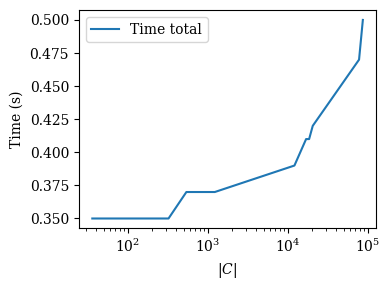

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
gdf.plot(x='$|C|$', y='Time total', ax=ax)
ax.set_xscale('log')
ax.set_ylabel('Time (s)')
ax.set_xlabel('$|C|$')
fig.tight_layout()

In [5]:
print(gdf.to_latex(index=False, escape=False))

\begin{tabular}{rrrrrr}
\toprule
 $|C|$ &  Intention &  Query &  Time model &  Time query &  Time total \\
\midrule
    36 &         59 &    397 &        0.31 &        0.04 &        0.35 \\
   323 &         42 &    265 &        0.32 &        0.03 &        0.35 \\
   540 &         61 &    403 &        0.32 &        0.05 &        0.37 \\
  1224 &         64 &    412 &        0.32 &        0.05 &        0.37 \\
 12113 &         60 &    400 &        0.34 &        0.05 &        0.39 \\
 16949 &         56 &    395 &        0.34 &        0.07 &        0.41 \\
 18492 &         55 &    385 &        0.35 &        0.06 &        0.41 \\
 20525 &         55 &    392 &        0.35 &        0.07 &        0.42 \\
 77832 &         54 &    382 &        0.40 &        0.07 &        0.47 \\
 86832 &         67 &    509 &        0.41 &        0.09 &        0.50 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1457481/268600150.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(gdf.to_latex(index=False, escape=False))


In [6]:
((gdf["Query"] - gdf["Intention"]) / gdf["Query"]).mean()

0.8538262932217824

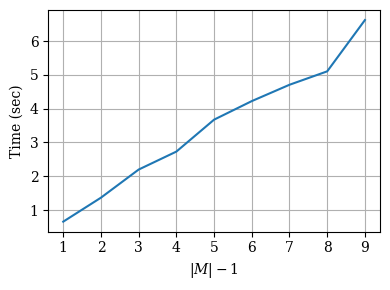

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
df3 = pd.read_csv('../../../resources/intention/explain_scalability_python.csv')
df3["time"] = df3["time"] / 1000
df3.groupby(["measures"]).mean().reset_index().plot(ax=ax, x='measures', y='time', legend=False)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('$|M| - 1$')
ax.set_xticks([x for x in range(1, 10)])
ax.grid(True)
fig.tight_layout()
fig.savefig('../../../resources/intention/scalability.pdf')
fig.savefig('../../../resources/intention/scalability.svg')